# Netflix Movie Data Analysis

In [2]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Loading a CSV file into DataFrame
df=pd.read_csv('mymoviedb.csv',lineterminator='\n')
#Viewing the DataFrame's first few rows
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r
0,15-12-2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,01-03-2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,25-02-2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,24-11-2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,22-12-2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [3]:
#Inspecting DataFrame structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
        9837 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [4]:
#Attempt to convert 'Release_Date' to datetime,invalid formats become NaT
df['Release_Date']=pd.to_datetime(df['Release_Date'],errors='coerce',dayfirst=True)
#Drop rows where 'Release_Date'is NaT(invalid date)
df=df.dropna(subset=['Release_Date'])
#Drop rows where 'Vote_Count'is missing
df=df.dropna(subset=['Vote_Count'])
#Convert 'Vote_Count'to integer
df['Vote_Count']=df['Vote_Count'].astype(int)
#Ensure'Vote_Average'is numeric
df['Vote_Average']=pd.to_numeric(df['Vote_Average'],errors='coerce')

In [5]:
#Inspecting DataFrame's structure
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9826 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9826 non-null   datetime64[ns]
 1   Title              9826 non-null   object        
 2   Overview           9826 non-null   object        
 3   Popularity         9826 non-null   float64       
 4   Vote_Count         9826 non-null   int64         
 5   Vote_Average       9826 non-null   float64       
 6   Original_Language  9826 non-null   object        
 7   Genre              9826 non-null   object        
        9826 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 767.7+ KB


In [6]:
#Now we check the Genre column
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [7]:
#Check and count for duplicate rows in the DataFrame
df.duplicated().sum()

np.int64(0)

In [8]:
#Basic statistics (count,mean,min/max,quantities)
df.describe()

,Release_Date,Popularity,Vote_Count,Vote_Average
count,9826,9826.000000,9826.000000,9826.000000
mean,2006-09-23 04:47:14.276409600,40.323951,1392.943721,6.439467
min,1902-04-17 00:00:00,13.354000,0.000000,0.000000
25%,2000-10-17 12:00:00,16.128250,146.000000,5.900000
50%,2011-09-12 00:00:00,21.195000,444.000000,6.500000
75%,2017-11-22 00:00:00,35.179250,1376.000000,7.100000
max,2024-07-03 00:00:00,5083.954000,31077.000000,10.000000
std,NaN,108.879332,2611.303856,1.129797


In [9]:
#Again we print the DataFrame to perform next operations
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [10]:
#Applying changes in 'Release_Date'because we only require year neither day nor month,so we only print the year in 'Release_Date 'column
df['Release_Date']=df['Release_Date'].dt.year #prints only year
df['Release_Date'].dtypes #to know the type of the column

dtype('int32')

In [11]:
#Print the DataFrame to check whether the 'Release_Date'column changed or not
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [12]:
#Now we will select the unnecessary columns that are not required
cols=['Overview','Original_Language','Poster_Url\r']

In [13]:
#Now we drop columnns
df.drop(cols,axis=1,inplace=True) #columns dropped
#checking all columns
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [14]:
#Checking dataset to know whether the columns removed or not
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [16]:
#Now we convert the 'Vote_Average'column from numerical to categorical data to understand the information easily
def categorize_col(df,col,labels):
    #Now we get the min,25%,50%,75% and max values from the column's ststistics
    edges=[df[col].describe()['min'],
           df[col].describe()['25%'],
           df[col].describe()['50%'],
           df[col].describe()['75%'],
           df[col].describe()['max']]
    #Converting the numerical column into categorical bins
    df[col]=pd.cut(df[col],edges,labels=labels,duplicates='drop')
    return df

In [17]:
#Now we define category names for the bins(ranges of values)
labels=['Not_Popular','Below_Avg','Average','Popular']
categorize_col(df,'Vote_Average',labels) #Function call to categorize the  data
df['Vote_Average'].unique() ##Unique categories in the column

['Popular', 'Below_Avg', 'Average', 'Not_Popular', NaN]
Categories (4, object): ['Not_Popular' < 'Below_Avg' < 'Average' < 'Popular']

In [18]:
#Checking the dataset whether the 'Vote_Average'column categorized or not
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Below_Avg,Thriller
3,2021,Encanto,2402.201,5076,Popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Average,"Action, Adventure, Thriller, War"


In [19]:
#Now we count how many movies are in each rating category(e.g.'Popular','Average',etc..)
df['Vote_Average'].value_counts()

Vote_Average
Not_Popular    2467
Popular        2450
Average        2411
Below_Avg      2398
Name: count, dtype: int64

In [20]:
#Removing duplicate as well as missing values
df.dropna(inplace=True) 
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [21]:
#Again printing DataFrame
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Below_Avg,Thriller
3,2021,Encanto,2402.201,5076,Popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Average,"Action, Adventure, Thriller, War"


In [22]:
""" There are more than one data in Genre column in each row
We'll represent genne's in seperate lines 
We'll split genres into a list and then explode our df to have only one Genre per row for each movie"""
df['Genre']=df['Genre'].str.split(', ') #we have spaces after one genre so we'll remove them by splitting
df=df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


In [23]:
#Casting column into category
df['Genre']=df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [24]:
#Casted categories_dtype=object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25551 non-null  int32   
 1   Title         25551 non-null  object  
 2   Popularity    25551 non-null  float64 
 3   Vote_Count    25551 non-null  int64   
 4   Vote_Average  25551 non-null  category
 5   Genre         25551 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [25]:
#Now we'll check the unique data in a particular columns that we have
df.nunique()

Release_Date     100
Title           9414
Popularity      8087
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

# Data visualization

In [28]:
#set the style
sns.set_style('whitegrid')

# 1. What is the most frequent Genre of movies released on netflix?

In [29]:
df['Genre'].describe()

count     25551
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

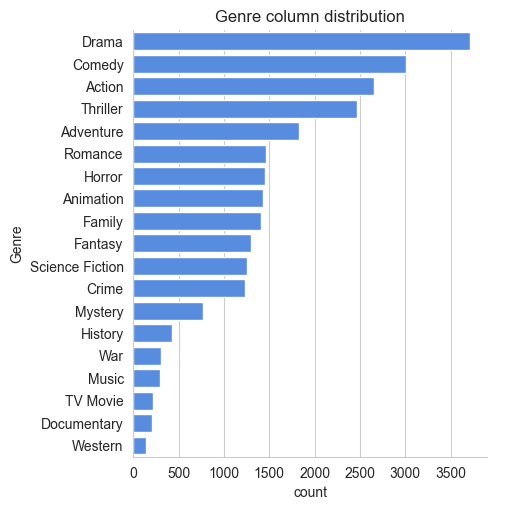

In [30]:
#Graph 
sns.catplot(y='Genre',data=df,kind='count',order=df['Genre'].value_counts().index,color='#4287f5')
plt.title("Genre column distribution")
plt.show()

# 2. Which has highest votes in vote average column?

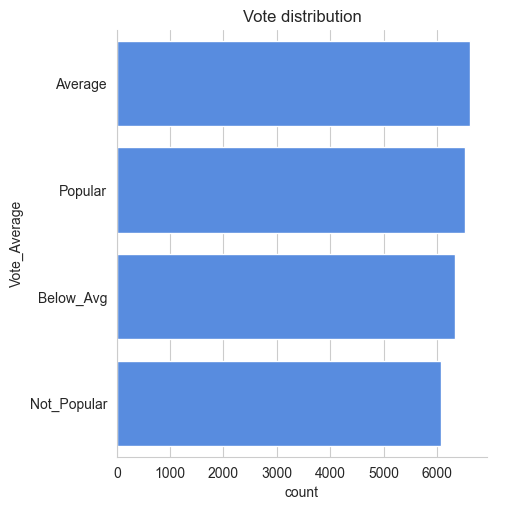

In [31]:
#Creating categorical plot(count plot in this case)
sns.catplot(y='Vote_Average',data=df,kind='count',
            order=df['Vote_Average'].value_counts().index,color='#4287f5')
plt.title('Vote distribution')
plt.show()

# 3. Which movie got the highest popularity? what's it's genre?

In [32]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction


# 4. Which movie got the lowest popularity? what's it's genre?

In [33]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25545,2021,The United States vs. Billie Holiday,13.354,152,Average,Music
25546,2021,The United States vs. Billie Holiday,13.354,152,Average,Drama
25547,2021,The United States vs. Billie Holiday,13.354,152,Average,History
25548,1984,Threads,13.354,186,Popular,War
25549,1984,Threads,13.354,186,Popular,Drama
25550,1984,Threads,13.354,186,Popular,Science Fiction


# 5. Which year has the most flimmed movies?

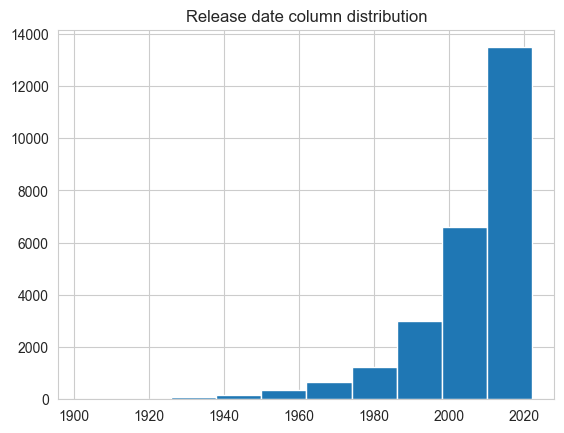

In [34]:
df['Release_Date'].hist()
plt.title("Release date column distribution")
plt.show()

# 6. What are the top 10 most popular movies?

In [36]:
# Top 10 popular movies (drop duplicate titles)
top_10_popular = df.drop_duplicates('Title').sort_values('Popularity', ascending=False).head(10)
top_10_popular[['Title', 'Popularity']]

,Title,Popularity
0,Spider-Man: No Way Home,5083.954
3,The Batman,3827.658
6,No Exit,2618.087
7,Encanto,2402.201
11,The King's Man,1895.511
15,The Commando,1750.484
18,Scream,1675.161
21,Kimi,1601.782
22,Fistful of Vengeance,1594.013
25,Eternals,1537.406


# 7. Which Genre appears most frequently each year?

In [38]:
#filtered from 2000 onwards
genre_per_year = df.groupby(['Release_Date', 'Genre'], observed=True).size().reset_index(name='Count')
genre_per_year = genre_per_year[genre_per_year['Release_Date'] >= 2000]
most_common = genre_per_year.sort_values('Count', ascending=False).drop_duplicates('Release_Date')
most_common[['Release_Date', 'Genre', 'Count']]

,Release_Date,Genre,Count
1358,2021,Drama,263
1282,2017,Drama,235
1301,2018,Drama,212
1263,2016,Drama,201
1320,2019,Drama,174
1339,2020,Drama,147
1244,2015,Drama,137
1206,2013,Drama,134
1225,2014,Drama,126
1168,2011,Drama,114


# 8. What is the trend of movie releases over the years?

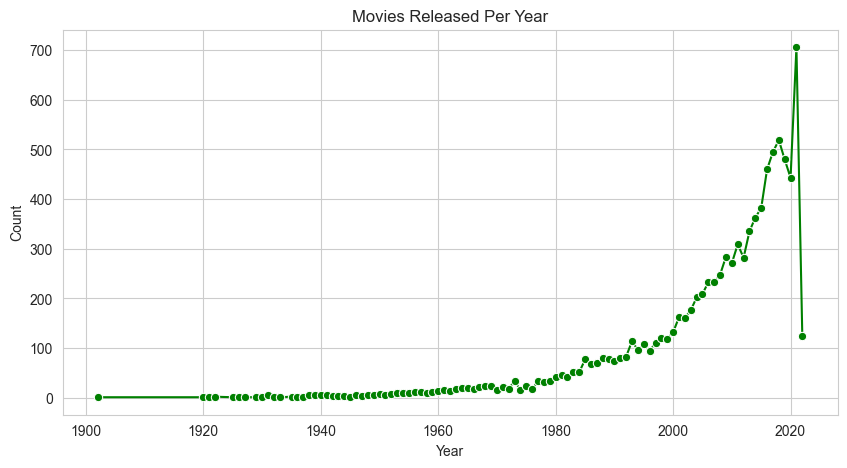

In [39]:
# Line plot of number of movies per year
movies_per_year = df.drop_duplicates('Title')['Release_Date'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values, marker='o', color='green')
plt.title('Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# 9.Which Genres have thee highest average popularity?

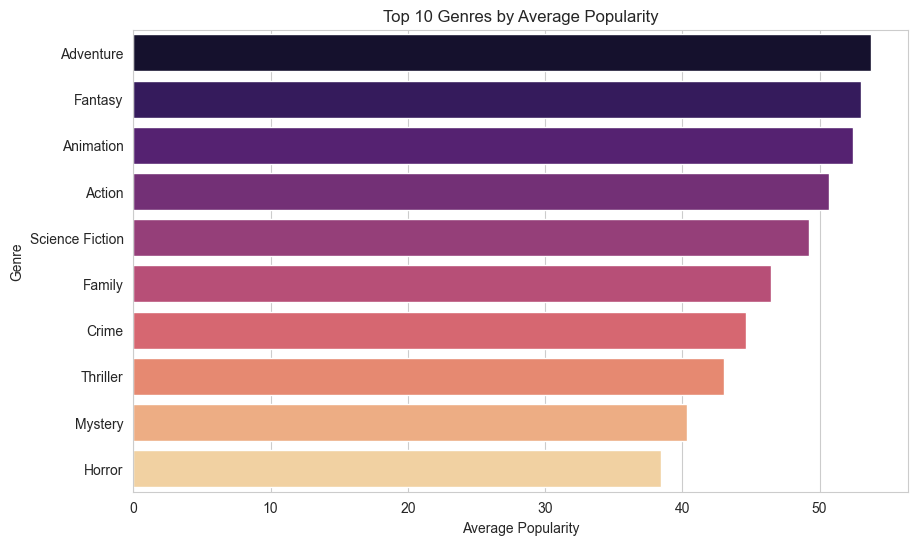

In [47]:
# Top 10 genres by average popularity
df['Genre'] = df['Genre'].str.strip()
df = df.dropna(subset=['Genre', 'Popularity'])
# Calculate average popularity
avg_popularity = (
    df.groupby('Genre', observed=True)['Popularity']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index())
# Plotting with hue and no legend to silence FutureWarning
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_popularity, x='Popularity', y='Genre', hue='Genre', palette='magma', legend=False)
plt.title('Top 10 Genres by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.show()

# 10. What are the most common words used in movie titles?

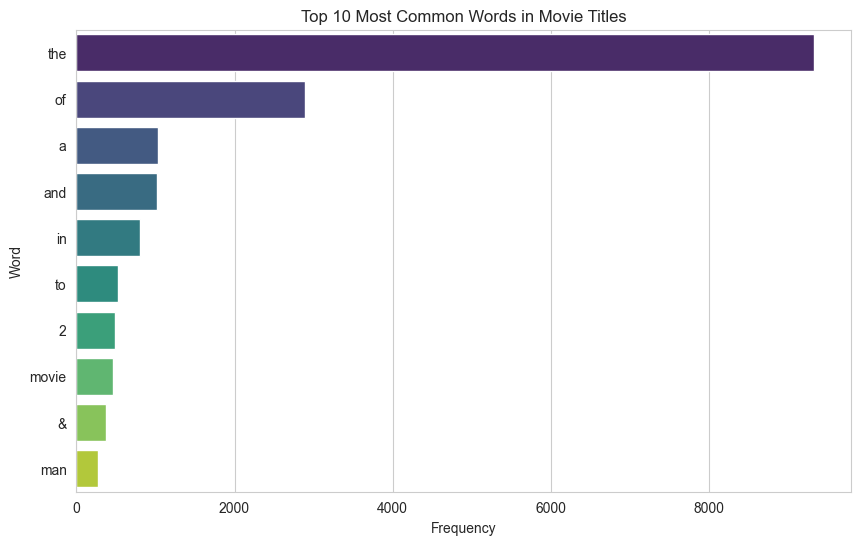

In [50]:
# Analyze the most common words in the movie titles by:
# 1. Combining all titles into one string, converting to lowercase, and splitting into words.
# 2. Counting the frequency of each word using Counter.
# 3. Selecting the top 10 most frequent words.
# 4. Creating a DataFrame from these words and their counts.
# 5. Plotting a horizontal bar chart to visualize the top 10 most common words in movie titles,
from collections import Counter
title_words = ' '.join(df['Title']).lower().split()
common_words = Counter(title_words).most_common(10)
words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Word', data=words_df, palette='viridis', hue='Word', dodge=False, legend=False)
plt.title('Top 10 Most Common Words in Movie Titles')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()